In [2]:
#Impot the libraries
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = yf.Ticker('TSLA')
df = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-06-01,755.159973,771.979980,730.919983,740.369995,740.369995,25749300
2022-06-02,732.469971,792.630005,726.200012,775.000000,775.000000,31157700
2022-06-03,729.679993,743.390015,700.250000,703.549988,703.549988,37348100


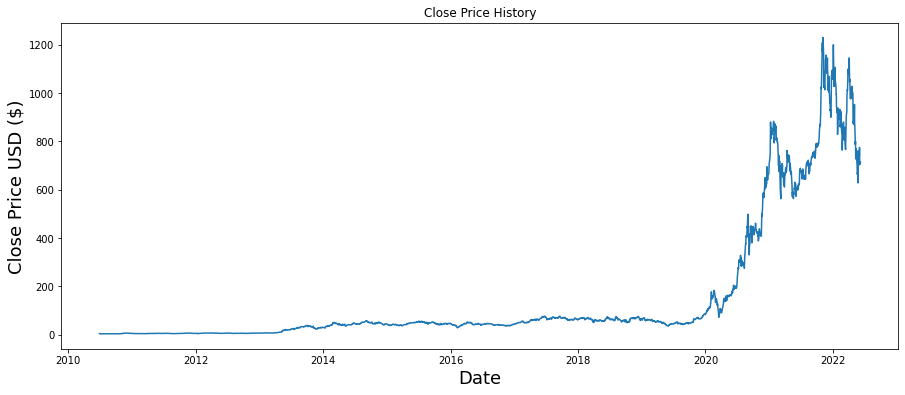

In [7]:
#Visualize the closing price history
plt.figure(figsize=(15,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [9]:
#Calculate the Short/Fast Exponential Moving Average
ShortEMA = df.Close.ewm(span=5, adjust=False).mean() #AKA Fast moving average

In [10]:
#Calculate the Middle Exponential Moving Average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean() #AKA Slow moving average

In [11]:
#Calculate the Long/Slow Exponential Moving Average
LongEMA = df.Close.ewm(span=63, adjust=False).mean() #AKA Slow moving average

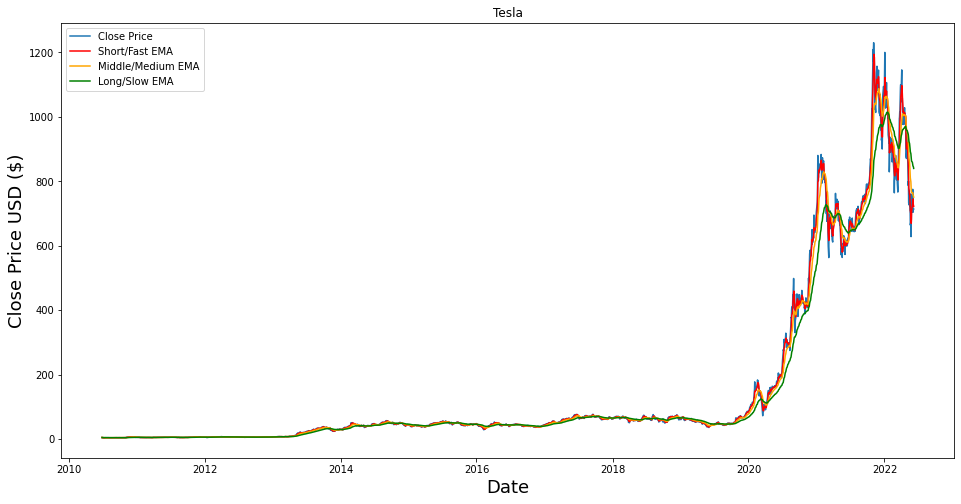

In [12]:
#Visualize the closing price and the exponential moving averages
plt.figure(figsize=(16,8))
plt.title('Tesla')

plt.plot(df['Close'], label = 'Close Price')

plt.plot(ShortEMA, label='Short/Fast EMA', color = 'red')

plt.plot(MiddleEMA, label='Middle/Medium EMA', color = 'orange')

plt.plot(LongEMA, label='Long/Slow EMA', color = 'green')

plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [13]:
#Add the exponential moving averages to the data set
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA

In [14]:
#Show the data 
df

,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
Date,,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,4.778000,4.778000,4.778000
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,4.774000,4.776909,4.777625
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,4.646667,4.741917,4.765574
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,4.377778,4.659925,4.736650
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,3.992518,4.529204,4.689317
...,...,...,...,...,...,...,...,...,...
2022-06-01,755.159973,771.979980,730.919983,740.369995,740.369995,25749300,729.933810,762.328980,855.148689
2022-06-02,732.469971,792.630005,726.200012,775.000000,775.000000,31157700,744.955874,763.480891,852.644043
2022-06-03,729.679993,743.390015,700.250000,703.549988,703.549988,37348100,731.153912,758.032627,847.984854


In [15]:
#Create a function to execute the strategy to determine when to buy and sell the stock.

In [17]:
#Create a function to buy and sell the stock (The trading strategy)
def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):

        if data['Middle'][i] < data['Long'][i] and data['Middle'][i] > data['Short'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True

        elif data['Middle'][i] > data['Long'][i] and data['Middle'][i] < data['Short'][i] and flag_short == False and flag_long == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True

        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)

    return (buy_list, sell_list)

In [18]:
#Add the Buy and Sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

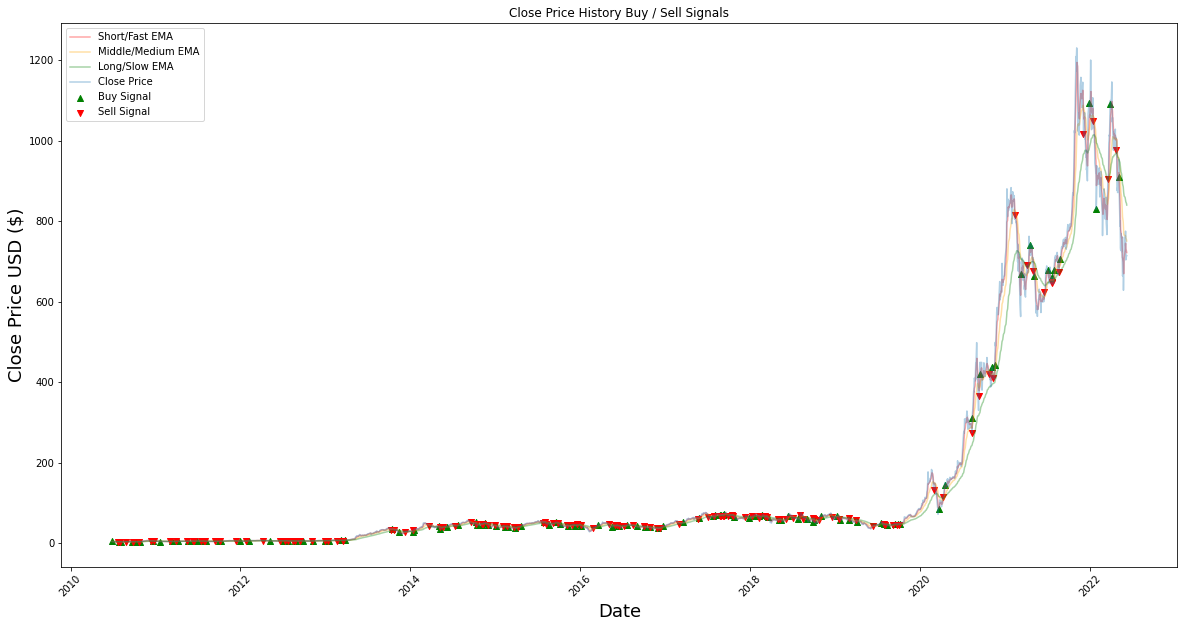

In [21]:
# Visually Show The Stock buy and sell signals
#Create and plot the graph

plt.figure(figsize=(20,10)) #width = 12.2in, height = 4.5

plt.scatter(df.index, df['Buy'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)

plt.plot(ShortEMA, label='Short/Fast EMA', color = 'red', alpha = 0.35)
plt.plot(MiddleEMA, label='Middle/Medium EMA', color = 'orange', alpha = 0.35)
plt.plot(LongEMA, label='Long/Slow EMA', color = 'green', alpha = 0.35)
plt.plot( df['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

plt.xticks(rotation=45)
plt.title('Close Price History Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()